In [114]:
import numpy
import matplotlib
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.facecolor'] = 'white'

In [115]:
path_HOT = '/home/amigos/data/experiments/logger/loatt_sweep/20181026_043839'
path_COLD = '/home/amigos/data/experiments/logger/loatt_sweep/20181026_044446'

In [116]:
#HOT
loatt_cur_file_HOT = numpy.loadtxt(path_HOT + '/loatt.txt')
sis_cur_file_HOT = numpy.loadtxt(path_HOT + '/sis_cur.txt')
sis_vol_file_HOT = numpy.loadtxt(path_HOT + '/sis_vol.txt')
#COLD
loatt_cur_file_COLD = numpy.loadtxt(path_COLD + '/loatt.txt')
sis_cur_file_COLD = numpy.loadtxt(path_COLD + '/sis_cur.txt')

In [117]:
loatt_cur_file_HOT.shape

(2919, 10)

In [118]:
beam = '3l'

beam_list = ['2l', '2r', '3l', '3r',
                       '4l', '4r', '5l', '5r', 
                       '1lu', '1ll', '1ru', '1rl']

loatt_beam_list = ['2l', '2r', '3l', '3r',
                       '4l', '4r', '5l', '5r', 
                       '1l', '1r' ]

loatt_cur_HOT = loatt_cur_file_HOT[:,beam_list.index(beam)]
loatt_cur_COLD = loatt_cur_file_COLD[:,beam_list.index(beam)]
sis_cur_HOT = sis_cur_file_HOT[:,beam_list.index(beam)]
sis_vol_HOT = sis_vol_file_HOT[:,beam_list.index(beam)]
sis_cur_COLD = sis_cur_file_COLD[:,beam_list.index(beam)]
xffts_power_HOT = numpy.loadtxt(path_HOT + '/xffts.txt')
xffts_power_COLD = numpy.loadtxt(path_COLD + '/xffts.txt')

In [119]:
print(len(xffts_power_COLD))
print(len(xffts_power_HOT))

2957
2919


In [ ]:
lo

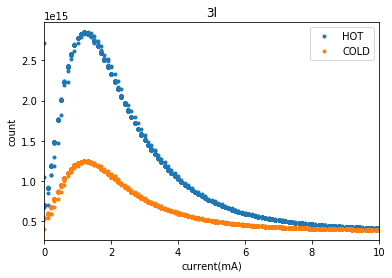

In [59]:
plt.plot(loatt_cur_HOT, xffts_power_HOT,'.',label = 'HOT')
plt.plot(loatt_cur_COLD, xffts_power_COLD, '.',label = 'COLD')
plt.xlabel('current(mA)')
plt.ylabel('count')
#plt.ylim(0,1e16)
plt.xlim(0,10)
plt.legend()
plt.title(beam)
plt.show()

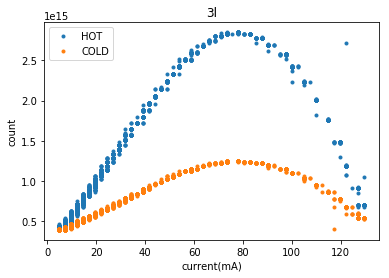

In [60]:
plt.plot(sis_cur_HOT, xffts_power_HOT,'.',label = 'HOT')
plt.plot(sis_cur_COLD, xffts_power_COLD, '.',label = 'COLD')
plt.xlabel('current(mA)')
plt.ylabel('count')
#plt.ylim(0,1e16)
#plt.xlim(0,10)
plt.legend()
plt.title(beam)
plt.show()

In [61]:
print(len(xffts_power_HOT))
print(len(xffts_power_COLD))

2919
2957


In [99]:
xffts_power_COLD = numpy.delete(xffts_power_COLD,-1) 
print(len(xffts_power_COLD))

2919


In [100]:
Y_factor = xffts_power_HOT/xffts_power_COLD

Trx = (300-77*Y_factor)/(Y_factor-1)

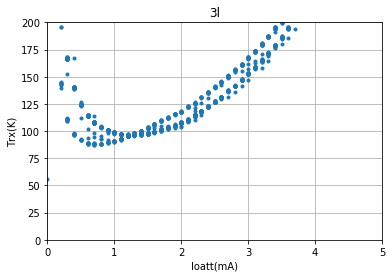

In [107]:
plt.plot(loatt_cur_HOT , Trx,'.')
plt.ylim(0,200)
plt.xlim(0,5)
plt.grid()
plt.xlabel('loatt(mA)')
plt.ylabel('Trx(K)')
plt.title(beam)

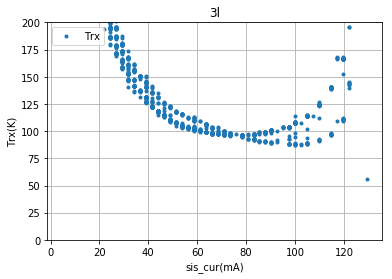

In [102]:
plt.plot(sis_cur_HOT , Trx, '.',label = 'Trx')
plt.ylim(0,200)
plt.grid()
plt.legend()
plt.xlabel('sis_cur(mA)')
plt.ylabel('Trx(K)')
plt.title(beam)

In [106]:
idmask = (Trx <= 10000) & (Trx >= 70)
index_min = numpy.argmin(Trx[idmask])

loatt_cur_min = loatt_cur_HOT[idmask][index_min]
Trx_min = Trx[idmask][index_min]
sis_current_min = sis_cur_HOT[idmask][index_min]
sis_vol_min = sis_vol_HOT[idmask][index_min]
print('beam:',beam,)
print("loatt_current :", loatt_cur_min,"                     Trx: ", Trx_min, " [K] ")
print("sis_current :", sis_current_min,"               sis_voltage: ", sis_vol_min, " [mV] ")

beam: 3l
loatt_current : 0.7000000000000001                      Trx:  87.44647459922182  [K] 
sis_current : 100.09765625                sis_voltage:  7.8125  [mV] 
